<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_67/blob/main/Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TECNOLOGICO DE MONTEREY





#Maestria en inteligencia artificial aplicada





##Ciencia y Analitica de datos


##Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans



## Profesora:

María de la Paz Rico Fernández





# Presentado por: 

Jerson David Perez Contreras

A01793810

Liga Git: 

In [18]:
#Importación de Librerías
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform

In [19]:
#Importar datos
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))

zipfile.extractall('/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo')
## trabajamos con la base de Aguas subterraneas.
df = pd.read_csv("/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding="cp1252")
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [20]:
## Miramos valores faltantes
df.isna().sum()/df.shape[0]

CLAVE                   0.000000
SITIO                   0.000000
ORGANISMO_DE_CUENCA     0.000000
ESTADO                  0.000000
MUNICIPIO               0.000000
ACUIFERO                0.000000
SUBTIPO                 0.000000
LONGITUD                0.000000
LATITUD                 0.000000
PERIODO                 0.000000
ALC_mg/L                0.003745
CALIDAD_ALC             0.003745
CONDUCT_mS/cm           0.005618
CALIDAD_CONDUC          0.005618
SDT_mg/L                1.000000
SDT_M_mg/L              0.001873
CALIDAD_SDT_ra          0.001873
CALIDAD_SDT_salin       0.001873
FLUORUROS_mg/L          0.000000
CALIDAD_FLUO            0.000000
DUR_mg/L                0.000936
CALIDAD_DUR             0.000936
COLI_FEC_NMP/100_mL     0.000000
CALIDAD_COLI_FEC        0.000000
N_NO3_mg/L              0.000936
CALIDAD_N_NO3           0.000936
AS_TOT_mg/L             0.000000
CALIDAD_AS              0.000000
CD_TOT_mg/L             0.000000
CALIDAD_CD              0.000000
CR_TOT_mg/

In [21]:
df.describe

<bound method NDFrame.describe of             CLAVE                                     SITIO  \
0          DLAGU6                              POZO SAN GIL   
1       DLAGU6516                    POZO R013 CAÑADA HONDA   
2          DLAGU7                                POZO COSIO   
3          DLAGU9                        POZO EL SALITRILLO   
4        DLBAJ107                        RANCHO EL TECOLOTE   
...           ...                                       ...   
1063  OCRBR5101M1              L-310 (COMUNIDAD SAN MANUEL)   
1064  OCRBR5102M1  L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS)   
1065  OCRBR5105M2                HACIENDA MEXIQUITO POZO 01   
1066  OCRBR5106M1                     COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                      COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES           ASIENTOS   
1          LERMA SANTIAGO PACIFICO       AGUASCALIENT

In [22]:
# para efectos del analsiis se elimara la columna SDT_mg/L y CLAVE AL TENER AL NO SIGINIFICAR NINGUN DATO EN EL LA BASE

df.drop(columns=["SDT_mg/L"], inplace=True)
df.drop(columns=["CLAVE"], inplace=True)


In [24]:

## AL REVISAR LOS VALORES NULOS SE ENCUENTRA QUE EL CMAPO CONTAMINANTE TIENE UN 40 DE VALORES NULOS
## HACEMOS UNA REVISION DE ESTA VARIABLE

set(df['CONTAMINANTES'])

{'ALC,',
 'ALC,AS,FE,',
 'ALC,AS,MN,FE,',
 'ALC,CF,',
 'ALC,CONDUC,',
 'ALC,CONDUC,AS,MN,',
 'ALC,CONDUC,DT,',
 'ALC,CONDUC,DT,MN,NO3,',
 'ALC,CONDUC,DT,NO3,',
 'ALC,CONDUC,SDT_ra,SDT_salin,DT,FE,NO3,',
 'ALC,CONDUC,SDT_ra,SDT_salin,DT,MN,FE,',
 'ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,',
 'ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,',
 'ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,MN,FE,',
 'ALC,CONDUC,SDT_ra,SDT_salin,FLUO,NO3,',
 'ALC,DT,',
 'ALC,DT,AS,MN,',
 'ALC,DT,FE,',
 'ALC,DT,MN,',
 'ALC,DT,NO3,',
 'ALC,FE,',
 'ALC,FLUO,',
 'ALC,FLUO,AS,',
 'ALC,FLUO,AS,FE,',
 'ALC,FLUO,AS,NO3,',
 'ALC,MN,',
 'ALC,MN,FE,',
 'ALC,NO3,',
 'ALC,SDT_ra,SDT_salin,DT,MN,FE,',
 'AS,',
 'AS,CR,',
 'AS,FE,',
 'AS,MN,FE,',
 'AS,NO3,',
 'CF,',
 'CF,CD,MN,FE,',
 'CF,FE,',
 'CF,FE,NO3,',
 'CF,MN,',
 'CF,MN,FE,',
 'CF,NO3,',
 'CF,PB,',
 'CONDUC,',
 'CONDUC,AS,FE,',
 'CONDUC,DT,',
 'CONDUC,DT,AS,',
 'CONDUC,DT,CD,',
 'CONDUC,DT,CF,',
 'CONDUC,DT,CF,AS,NO3,',
 'CONDUC,DT,FE,',
 'CONDUC,DT,MN,FE,',
 'CONDUC,DT,NO3,',
 'CO

In [28]:
# al ser de tipo descriptivo o categorico lo reemplazaremos como no especificado
df['CONTAMINANTES'] = df['CONTAMINANTES'].replace(np.nan, "Desconocido")

## volvemos a revisare los camopos nulos
(df.isna().sum()/df.shape[0])*100

SITIO                   0.000000
ORGANISMO_DE_CUENCA     0.000000
ESTADO                  0.000000
MUNICIPIO               0.000000
ACUIFERO                0.000000
SUBTIPO                 0.000000
LONGITUD                0.000000
LATITUD                 0.000000
PERIODO                 0.000000
ALC_mg/L                0.374532
CALIDAD_ALC             0.374532
CONDUCT_mS/cm           0.561798
CALIDAD_CONDUC          0.561798
SDT_M_mg/L              0.187266
CALIDAD_SDT_ra          0.187266
CALIDAD_SDT_salin       0.187266
FLUORUROS_mg/L          0.000000
CALIDAD_FLUO            0.000000
DUR_mg/L                0.093633
CALIDAD_DUR             0.093633
COLI_FEC_NMP/100_mL     0.000000
CALIDAD_COLI_FEC        0.000000
N_NO3_mg/L              0.093633
CALIDAD_N_NO3           0.093633
AS_TOT_mg/L             0.000000
CALIDAD_AS              0.000000
CD_TOT_mg/L             0.000000
CALIDAD_CD              0.000000
CR_TOT_mg/L             0.000000
CALIDAD_CR              0.000000
HG_TOT_mg/

In [29]:
# los demas campos con valores NULOS no son tan significativos, por esta razon se decide sacarlos de la data

df.dropna(inplace=True)
(df.isna().sum()/df.shape[0])*100


SITIO                   0.0
ORGANISMO_DE_CUENCA     0.0
ESTADO                  0.0
MUNICIPIO               0.0
ACUIFERO                0.0
SUBTIPO                 0.0
LONGITUD                0.0
LATITUD                 0.0
PERIODO                 0.0
ALC_mg/L                0.0
CALIDAD_ALC             0.0
CONDUCT_mS/cm           0.0
CALIDAD_CONDUC          0.0
SDT_M_mg/L              0.0
CALIDAD_SDT_ra          0.0
CALIDAD_SDT_salin       0.0
FLUORUROS_mg/L          0.0
CALIDAD_FLUO            0.0
DUR_mg/L                0.0
CALIDAD_DUR             0.0
COLI_FEC_NMP/100_mL     0.0
CALIDAD_COLI_FEC        0.0
N_NO3_mg/L              0.0
CALIDAD_N_NO3           0.0
AS_TOT_mg/L             0.0
CALIDAD_AS              0.0
CD_TOT_mg/L             0.0
CALIDAD_CD              0.0
CR_TOT_mg/L             0.0
CALIDAD_CR              0.0
HG_TOT_mg/L             0.0
CALIDAD_HG              0.0
PB_TOT_mg/L             0.0
CALIDAD_PB              0.0
MN_TOT_mg/L             0.0
CALIDAD_MN          

In [38]:
## ARREGLASMOA CAMPOS NUMERICOS
df['SDT_M_mg/L'].replace('<25', (25*.6), inplace=True)
df['FLUORUROS_mg/L'].replace('<0.2', (0.2*.6), inplace=True)
df['DUR_mg/L'].replace('<20', (20*.6), inplace=True)
df['COLI_FEC_NMP/100_mL'].replace('<1.1', (1.1), inplace=True)
df['N_NO3_mg/L'].replace('<0.02', (0.02), inplace=True)
df['AS_TOT_mg/L'].replace('<0.01', (0.01), inplace=True)
df['CD_TOT_mg/L'].replace('<0.003', (0.003), inplace=True)
df['CR_TOT_mg/L'].replace('<0.005', (0.005), inplace=True)
df['HG_TOT_mg/L'].replace('<0.0005', (0.0005), inplace=True)
df['PB_TOT_mg/L'].replace('<0.005', (0.005), inplace=True)
df['MN_TOT_mg/L'].replace('<0.0015', (0.0015), inplace=True)
df['FE_TOT_mg/L'].replace('<0.025', (0.025), inplace=True)

In [39]:
#Variables Numericas
var_numeric = ["ALC_mg/L","SDT_M_mg/L",'FLUORUROS_mg/L',  'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
    'CD_TOT_mg/L', 'CR_TOT_mg/L',  'HG_TOT_mg/L',  'PB_TOT_mg/L',  'MN_TOT_mg/L',  'FE_TOT_mg/L']

var_ategoricas = [ "DUR_mg/L",'SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO',  'CALIDAD_DUR','CONTAMINANTES',
 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE',
 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE',  'SEMAFORO']


df[var_numeric]= df[var_numeric].astype('float')

df[var_ategoricas] = df[var_ategoricas].astype('category')


#eXPLORACION DE DATOS

-

In [40]:
#Tendencias centrales promedio, media y mediana de los datos

df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471,896.945797,1.066555,359.734156,4.321651,0.019504,0.00303,0.013353,0.000557,0.005285,0.072960,0.412234
std,6.697568,3.875005,0.0,111.147849,1248.990617,2765.757924,1.936868,2065.705773,8.378332,0.035051,0.00090,0.155412,0.000470,0.003276,0.378856,5.574307
min,-116.664250,14.561150,2020.0,26.640000,110.000000,101.200000,0.120000,1.100000,0.020000,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000,338.050000,0.269475,1.100000,0.651667,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000,551.400000,0.506950,1.100000,2.082916,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.046900
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000,915.600000,1.142400,10.750000,5.190385,0.010000,0.00300,0.005000,0.000500,0.005000,0.009830,0.172275
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,24196.000000,121.007813,0.452200,0.03211,5.003200,0.014150,0.080900,8.982000,178.615000


In [41]:
##PORMEDIOS
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


LONGITUD               -101.848270
LATITUD                  23.161796
PERIODO                2020.000000
ALC_mg/L                234.695266
CONDUCT_mS/cm          1142.726471
SDT_M_mg/L              896.945797
FLUORUROS_mg/L            1.066555
COLI_FEC_NMP/100_mL     359.734156
N_NO3_mg/L                4.321651
AS_TOT_mg/L               0.019504
CD_TOT_mg/L               0.003030
CR_TOT_mg/L               0.013353
HG_TOT_mg/L               0.000557
PB_TOT_mg/L               0.005285
MN_TOT_mg/L               0.072960
FE_TOT_mg/L               0.412234
dtype: float64

In [42]:
## cORELACION

df[var_numeric].corr()


,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.074510,0.067264,-0.015783,0.005435,0.065314,0.034816,-0.014600,0.072218,0.016652,0.130373,0.043286
SDT_M_mg/L,0.074510,1.000000,-0.014403,-0.001160,0.102103,-0.010885,0.010795,-0.000678,0.015284,-0.005581,0.018260,0.019853
FLUORUROS_mg/L,0.067264,-0.014403,1.000000,0.003012,-0.018731,0.446736,-0.016349,-0.005108,-0.025779,-0.033661,-0.049755,-0.009889
COLI_FEC_NMP/100_mL,-0.015783,-0.001160,0.003012,1.000000,-0.000933,0.038762,-0.001725,-0.008918,-0.007580,0.022336,-0.005514,0.002994
N_NO3_mg/L,0.005435,0.102103,-0.018731,-0.000933,1.000000,-0.005037,-0.009390,-0.015169,0.014882,-0.016586,-0.036568,0.013543
AS_TOT_mg/L,0.065314,-0.010885,0.446736,0.038762,-0.005037,1.000000,-0.009071,-0.009499,-0.009118,-0.023032,0.017732,0.014824
CD_TOT_mg/L,0.034816,0.010795,-0.016349,-0.001725,-0.009390,-0.009071,1.000000,-0.001798,-0.004075,-0.002914,-0.004249,-0.001048
CR_TOT_mg/L,-0.014600,-0.000678,-0.005108,-0.008918,-0.015169,-0.009499,-0.001798,1.000000,0.005741,-0.001939,-0.005121,0.000624
HG_TOT_mg/L,0.072218,0.015284,-0.025779,-0.007580,0.014882,-0.009118,-0.004075,0.005741,1.000000,0.014304,0.642979,0.879621
PB_TOT_mg/L,0.016652,-0.005581,-0.033661,0.022336,-0.016586,-0.023032,-0.002914,-0.001939,0.014304,1.000000,-0.011060,0.002942


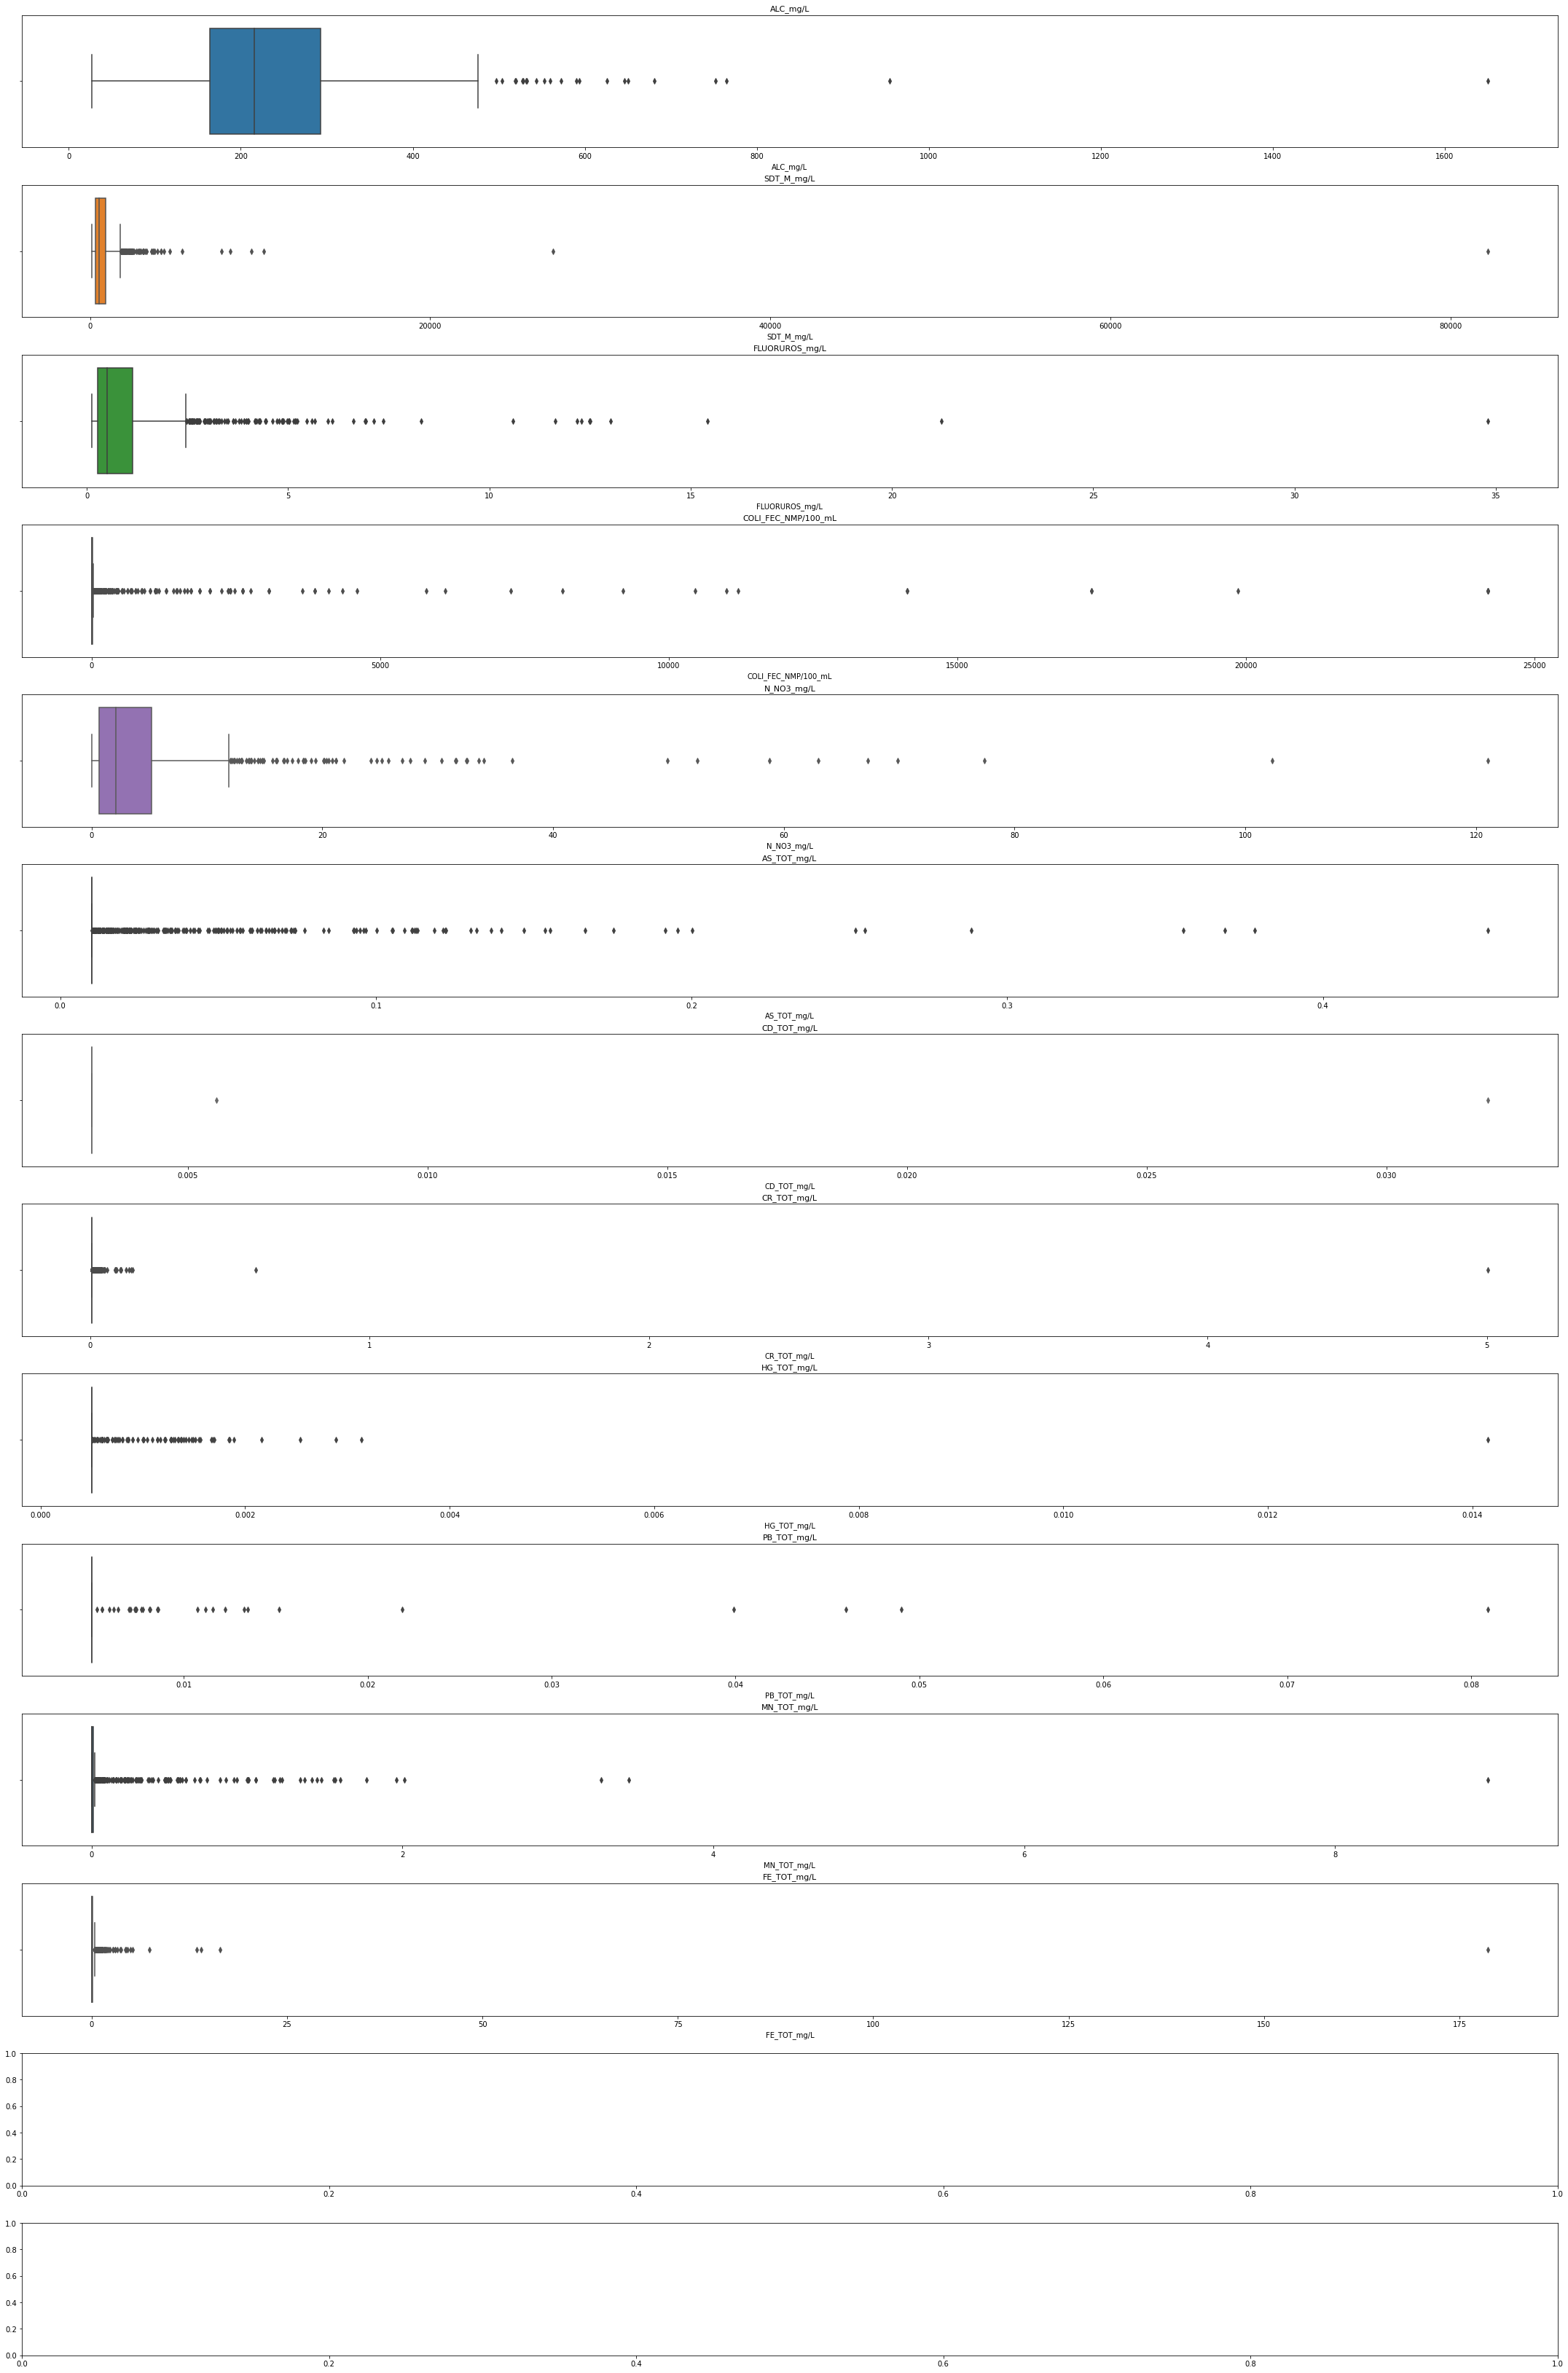

In [44]:
## graficas caja y bigotes, revision de outliers

fig, axes = plt.subplots(nrows=14, ncols=1, figsize=(30, 50))
axes = axes.flat

for i, colum in enumerate(var_numeric):
    sns.boxplot(
        data    = df,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],   
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 11)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)

#Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [45]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 471 kB/s 
     |████████████████████████████████| 1.0 MB 50.5 MB/s 
     |████████████████████████████████| 1.7 MB 49.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 56.8 MB/s 
     |████████████████████████████████| 6.3 MB 60.3 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=22c48ec1bce1a45337ef0cffd56e066a84b5f4e8ce381d058609905e25daf688
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=29b83c12b05268db90469ffaf8b4c81ead3310f533f306b0d076cae653387415
  Stored in directory: /root/.

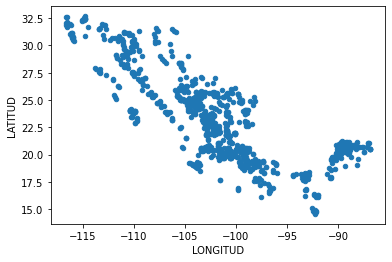

In [46]:
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import geopandas as gpd

latlong = df[["LATITUD","LONGITUD"]]

## GRAFICAR
latlong.plot.scatter("LONGITUD","LATITUD")

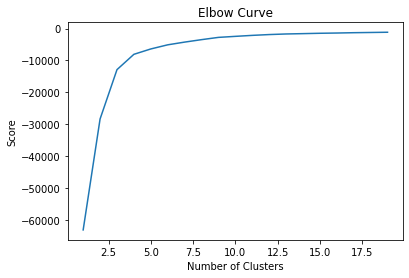

In [47]:
#K-Mean

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [68]:
kmeans = KMeans(n_clusters = 5, init ='k-means++') 
kmeans.fit(latlong[latlong.columns[0:2]])
labels = kmeans.labels_
labels

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [83]:
latlong = df[["LONGITUD","LATITUD"]]
kmeans = KMeans(n_clusters=4).fit(latlong) 
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(latlong) 
C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)
gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates") 
gdf_C.head()

,0,1,Coordinates
0,-111.262801,28.609425,POINT (-111.26280 28.60943)
1,-90.092716,19.650263,POINT (-90.09272 19.65026)
2,-100.179832,20.169847,POINT (-100.17983 20.16985)
3,-103.447389,24.664864,POINT (-103.44739 24.66486)


In [84]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [85]:
## OMBRE DE LOS COLORES DEACUERDO AL SEMAFORO
gdf['SEMAFORO'].replace('Verde', 'Green', inplace=True)
gdf['SEMAFORO'].replace('Rojo', 'Red', inplace=True)
gdf['SEMAFORO'].replace('Amarillo', 'Yellow', inplace=True)

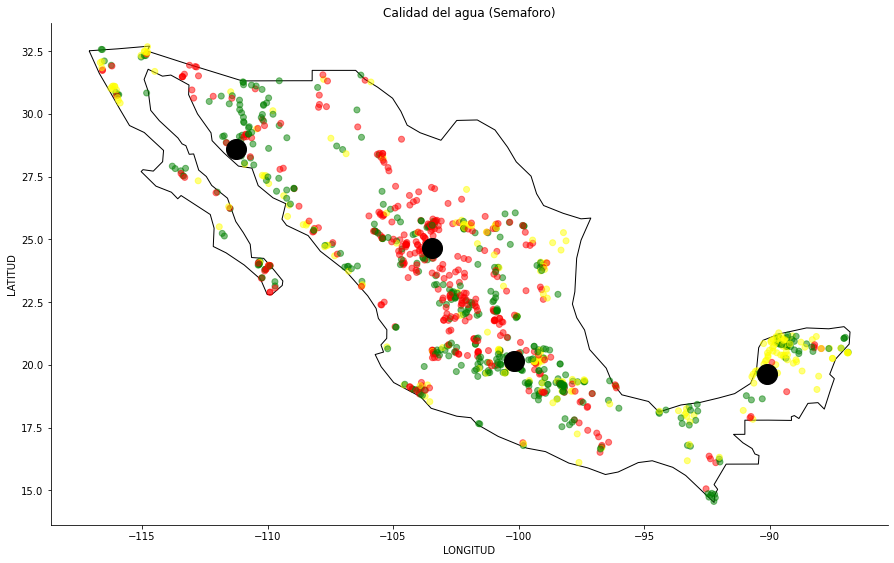

In [86]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

#mapoa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 

gdf.plot(ax=gax, color=gdf["SEMAFORO"], alpha = 0.5) 

gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 400) 

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Calidad del agua (Semaforo)')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()